<a href="https://colab.research.google.com/github/mm002a/JupyterNotebooks-V0.0/blob/main/LinInterpSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#For large graphs
#plt.rcParams["figure.figsize"] = (40,40)
#
def func(XA, DEBUG = 0):
  """
  This is the function we are trying to find the roots of.
  """
  FX = XA*XA - 2*XA + 1
  FX = XA*XA*XA - 0*XA - 1
  FX = np.sin(XA)

  if DEBUG == 1 :
    print("From <func> DEBUG=: ", DEBUG, " F(X): ",FX)
  return FX
def CalcXstar(X1, X2, Fstar, DEBUG = 0):
  xstar = X1 + (Fstar - func(X1,DEBUG)) * (X2 - X1)/(func(X2,DEBUG) - func(X1,DEBUG))
  return xstar
#
def LinInterpS(X1, X2, Ystar, DEBUG = 0):
#
  if DEBUG == 1 :
    print("x: ", x)
  Y1 = func(X1, DEBUG)
  Y2 = func(X2, DEBUG)

  Xstar = CalcXstar(X1, X2, Ystar, FN, DEBUG)
  print("           Xstar, f(Xstar): ", Xstar, func(Xstar,DEBUG))
  return Xstar
def BisectS(X1, X2, Ystar, FN, DEBUG = 0):
  """
  Inputs: the curent interval (X1,X2) the target- Ystar, th function name <FN>
  Output: the new Interval (X1new, X2new)
  """
  assert X1 < X2 , "The interval has become disordered!"

  Y1 = FN(X1, DEBUG)
  Y2 = FN(X2, DEBUG)
  assert Y1*Y2 <= 0, "We don't have a bracket!"
  Xmid = 0.5*(X1 + X2)
  Ymid = FN(Xmid, DEBUG)

  [X1new,X2new]=[Xmid,X2]
  if (Y1-Ystar)*(Ymid-Ystar)<0: [X1new,X2new]=[X1,Xmid]

  if DEBUG == 1 :
     # print('X1,Y1 {:12.3e}{:12.3e}'.format(X1,Y1),
      print('X1,Y1{:11.3e}{:11.3e}'.format(X1,Y1), # because I can!
            'X2,Y2{:11.3e}{:11.3e}'.format(X2,Y2),
            'Xmid,Ymid{:11.3e}{:11.3e}'.format(Xmid,Ymid), 
            ':X1new,X2new{:11.3e}{:11.3e}'.format(X1new,X2new))
  return [X1new, X2new]
def SlvShow(X1, X2, Xstar, Xscale=1.1,  DEBUG = 0):
  x = 2.0*np.linspace(-0.5, 1.25,num =51)
  Xmarg = 0.5* (X2 - X1)*(Xscale - 1.0)
  x = np.linspace(X1-Xmarg, X2+Xmarg,num =51)
  Y1 = func(X1, DEBUG)
  Y2 = func(X2, DEBUG)
  y = Y1 + (x - X1)*(Y2-Y1)/(X2 - X1)
  if DEBUG == 1 :
    print("x: ",x)
    print("y: ",y)
  plt.plot(x,y, label="y")
#
  plt.plot(x, Y1*np.ones(len(x)), label="Y1")
  plt.plot(x, Y2*np.ones(len(x)), label="Y2")
  plt.plot(x, Ystar*np.ones(len(x)), label="Y*")
#
  plt.plot([X1,X1], [np.min([Y1,Y2]),np.max([Y1,Y2])], label="X1")
  plt.plot([X2,X2], [np.min([Y1,Y2]),np.max([Y1,Y2])], label="X2")
  plt.plot([Xstar,Xstar], [np.min([Y1,Y2]),np.max([Y1,Y2])], label="Xstar")
#
  plt.plot(x, func(x), label="f(x)")
#
  plt.xlabel('x')
  plt.ylabel('func')
  #plt.legend()
  plt.show()
  return
  

Index:  0 func(Xmid)   6.8164e-01
Index:  1 func(Xmid)   1.2467e-01
Index:  2 func(Xmid)  -1.8640e-01
Index:  3 func(Xmid)  -3.1245e-02
Index:  4 func(Xmid)   4.6858e-02
Index:  5 func(Xmid)   7.8124e-03
Index:  6 func(Xmid)  -1.1718e-02
Index:  7 func(Xmid)  -1.9531e-03
Index:  8 func(Xmid)   2.9297e-03
Index:  9 func(Xmid)   4.8828e-04
Index:  10 func(Xmid)  -7.3242e-04
Index:  11 func(Xmid)  -1.2207e-04
Index:  12 func(Xmid)   1.8311e-04
Index:  13 func(Xmid)   3.0518e-05
Index:  14 func(Xmid)  -4.5776e-05
Index:  15 func(Xmid)  -7.6294e-06
Index:  16 func(Xmid)   1.1444e-05
Index:  17 func(Xmid)   1.9073e-06
Index:  18 func(Xmid)  -2.8610e-06
Index:  19 func(Xmid)  -4.7684e-07
Index:  20 func(Xmid)   7.1526e-07
Index:  21 func(Xmid)   1.1921e-07
Index:  22 func(Xmid)  -1.7881e-07
Index:  23 func(Xmid)  -2.9802e-08
Index:  24 func(Xmid)   4.4703e-08
Index:  25 func(Xmid)   7.4506e-09
Index:  26 func(Xmid)  -1.1176e-08
Index:  27 func(Xmid)  -1.8626e-09
Index:  28 func(Xmid)   2.7940

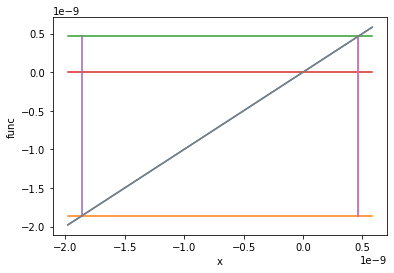

In [ ]:
DEBUG = 0
X1 = -0.5; X2 = 2; Ystar = 0

for INDEX in range(30):
  Xmid = 0.5*(X1 + X2)
  if DEBUG == 1 : 
    print("INDEX: ",INDEX," X1,X2,Xmid: ", X1,X2,Xmid,
          " f1, f2, f(X*): ", func(X1), func(X2), func(Xmid))
    #SlvShow(X1, X2, Xmid, DEBUG = 0)
  else : 
    print("Index: ", INDEX, "func(Xmid)", '{:12.4e}'.format(func(Xmid)))
  [X1,X2] = BisectS(X1, X2, Ystar, func, DEBUG = 0)
SlvShow(X1, X2, Xmid, DEBUG = 0)



From <func> DEBUG=:  1  F(X):  -1.125
From <func> DEBUG=:  1  F(X):  7
From <func> DEBUG=:  1  F(X):  -1.125


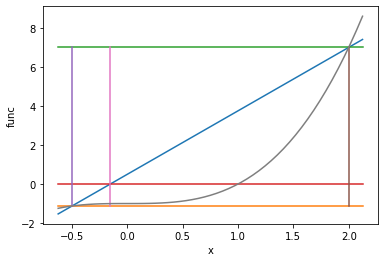

INDEX:  0  X1,X2,Xstar:  -0.5 2 -0.15384615384615385  f1, f2, f(X*):  -1.125 7 -1.003641329085116
           Xstar, f(Xstar):  -0.15384615384615385 -1.003641329085116
INDEX:  1  X1,X2,Xstar:  -0.15384615384615385 2 -0.15384615384615385  f1, f2, f(X*):  -1.003641329085116 7 -1.003641329085116
           Xstar, f(Xstar):  0.11624203821656048 -0.9984293130003853
INDEX:  2  X1,X2,Xstar:  0.11624203821656048 2 0.11624203821656048  f1, f2, f(X*):  -0.9984293130003853 7 -0.9984293130003853
           Xstar, f(Xstar):  0.35138810177999735 -0.9566128467533404
INDEX:  3  X1,X2,Xstar:  0.35138810177999735 2 0.35138810177999735  f1, f2, f(X*):  -0.9566128467533404 7 -0.9566128467533404
           Xstar, f(Xstar):  0.5495984899844689 -0.8339891044068393
INDEX:  4  X1,X2,Xstar:  0.5495984899844689 2 0.5495984899844689  f1, f2, f(X*):  -0.8339891044068393 7 -0.8339891044068393
           Xstar, f(Xstar):  0.7040050177760042 -0.6510788752766075
INDEX:  5  X1,X2,Xstar:  0.7040050177760042 2 0.704005017

In [ ]:
DEBUG = 1
X1 = -0.5; X2 = 2; Ystar = 0
assert ((func(X1)-Ystar)*(func(X2)-Ystar)) < 0.0, "We don't have a bracket!"
Xstar = CalcXstar(X1, X2, Ystar, DEBUG)
SlvShow(X1, X2, Xstar, DEBUG = 0)
for INDEX in range(10):
  if DEBUG == 1 : 
    print("INDEX: ",INDEX," X1,X2,Xstar: ", X1,X2,Xstar,
          " f1, f2, f(X*): ", func(X1), func(X2), func(Xstar))
  else : 
    print("Index: ", INDEX)
  Xstar = LinInterpS(X1,X2,Ystar, DEBUG = 0)
  if func(Xstar)*func(X1) > 0 : X1 = Xstar
  else : X2 = Xstar

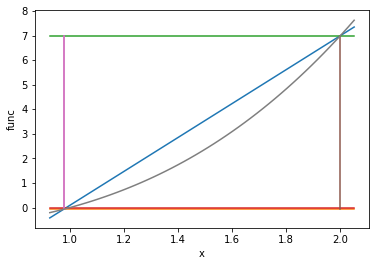

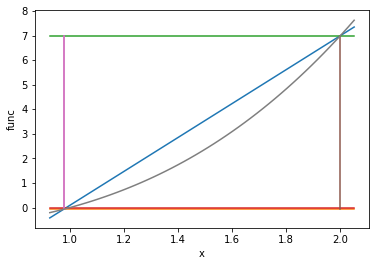

In [ ]:
SlvShow(X1, X2, Xstar, DEBUG = 0)
plt.close('all')
SlvShow(X1, X2, Xstar, DEBUG = 0)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(x)
  
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot([1,2,3,4],[-1,2,3,4])
  
for phase in np.linspace(0, 10*np.pi, 100):
#for INDEX in range(3):
    line1.set_ydata(np.sin(0.5 * x + phase))
    #print(INDEX)
    #plt.plot([1, 2, 3, 4],[1, 2, 3, INDEX])
    fig.canvas.draw()
    fig.canvas.flush_events()
    #plt.pause(1)

ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

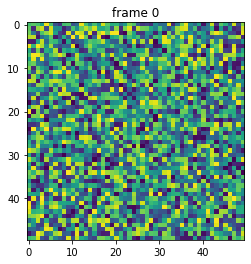

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.random((50, 50, 50))

fig, ax = plt.subplots()

for i in range(len(data)):
    ax.cla()
    ax.imshow(data[i])
    ax.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    plt.pause(0.5)